Visco-elasto-plasticity in simple shear
======

In [1]:
import UWGeodynamics as GEO

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

# Analysis

In [3]:
eta     = 1e22 * u.pascal * u.second # Viscosity
mu      = 10 * u.gigapascal # Shear Modulus
density = 2700 * u.kilogram / u.metre**3
gravity = 9.81 * u.metre / u.second**2
alpha = eta / mu # Relaxation time

# Scaling

In [4]:
model_height = 100. * u.kilometer
bodyforce = density * gravity

KL = model_height 
Kt = alpha
KM = bodyforce * KL**2 * Kt**2

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

In [5]:
Model = GEO.Model(elementRes=(16, 16),
                  minCoord=(0., 0.),
                  maxCoord=(100. * u.kilometer, 100. * u.kilometer),
                  periodic=[True, False])

In [6]:
Model.outputDir="ViscoElastoPlasticShear"

## Materials

In [7]:
viscoelastic = Model.add_material(name="Visco Elastic", shape=GEO.shapes.Layer(top=Model.top, bottom=Model.bottom))
viscoelasticBar = Model.add_material(name="Visco Elastic Bar", shape=GEO.shapes.Box(minX=40. * u.kilometer,
                                                                                    maxX=60. * u.kilometer,
                                                                                    top=Model.top,
                                                                                    bottom=Model.bottom))


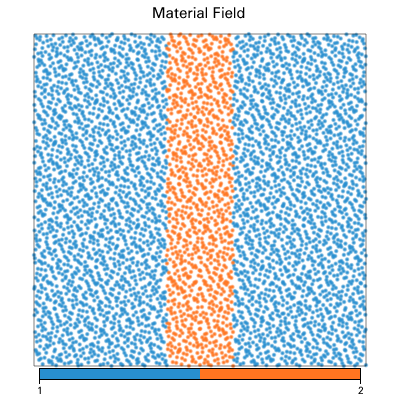

In [8]:
Fig = Model.plot.material(figsize=(400,400), fn_size=5.)

### Densities

In [9]:
viscoelastic.density = 2700. * u.kilogram / u.metre**3
viscoelasticBar.density = 2700. * u.kilogram / u.metre**3

### Viscosities

In [10]:
viscoelastic.viscosity = 1e22 * u.pascal * u.second
viscoelasticBar.viscosity = 1e22 * u.pascal * u.second

### Plasticity

In [11]:
# viscoelastic.plasticity = GEO.VonMises(cohesion=10. * u.megapascal)
# viscoelasticBar.plasticity = GEO.VonMises(cohesion=10. * u.megapascal)

### Elasticity

In [12]:
viscoelastic.elasticity = GEO.Elasticity(shear_modulus=10. * u.gigapascal,
                                         observation_time=20000. * u.year)
viscoelasticBar.elasticity = GEO.Elasticity(shear_modulus=10. * u.gigapascal,
                                         observation_time=20000. * u.year)

## Velocity Boundary conditions

In [13]:
Model.set_velocityBCs(top=[0.5 * u.centimeter / u.year, 0], bottom=[0, 0])

## Tracers

In [14]:
tracerSolo = Model.add_passive_tracers(name="Single Tracer", 
                                       vertices=[50. * u.kilometer,
                                                 50. * u.kilometer])


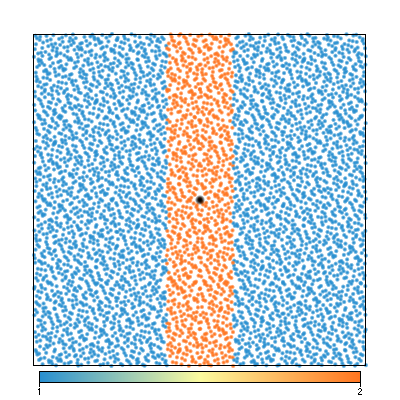

In [15]:
import glucifer

figMaterial = glucifer.Figure(figsize=(400,400))
figMaterial.Points(tracerSolo.swarm, pointSize=10, colourBar=False)
figMaterial.Points(Model.swarm, Model.materialField, pointSize=5)
figMaterial.show()

In [16]:
GEO.rcParams["solver"] = "lu"

In [17]:
tTracer      = [GEO.nd(Model.time)]
totalStress_xy  = [0.]

def postSolveHook():
    global tTracer, totalStress_xy
    tTracer.append(GEO.nd(Model.time))
    totalStress_xy.append(
        Model._elastic_stressFn[2].evaluate(Model.swarm)[0])

In [18]:
Model.postSolveHook = postSolveHook

In [19]:
Model.run_for(200000. * u.years)

Time:  6666.66666667 year dt: 6666.66666667 year
Time:  13333.3333333 year dt: 6666.66666667 year
Time:  20000.0 year dt: 6666.66666667 year
Time:  26666.6666667 year dt: 6666.66666667 year
Time:  33333.3333333 year dt: 6666.66666667 year
Time:  40000.0 year dt: 6666.66666667 year
Time:  46666.6666667 year dt: 6666.66666667 year
Time:  53333.3333333 year dt: 6666.66666667 year
Time:  60000.0 year dt: 6666.66666667 year
Time:  66666.6666667 year dt: 6666.66666667 year
Time:  73333.3333333 year dt: 6666.66666667 year
Time:  80000.0 year dt: 6666.66666667 year
Time:  86666.6666667 year dt: 6666.66666667 year
Time:  93333.3333333 year dt: 6666.66666667 year
Time:  100000.0 year dt: 6666.66666667 year
Time:  106666.666667 year dt: 6666.66666667 year
Time:  113333.333333 year dt: 6666.66666667 year
Time:  120000.0 year dt: 6666.66666667 year
Time:  126666.666667 year dt: 6666.66666667 year
Time:  133333.333333 year dt: 6666.66666667 year
Time:  140000.0 year dt: 6666.66666667 year
Time:  146

1


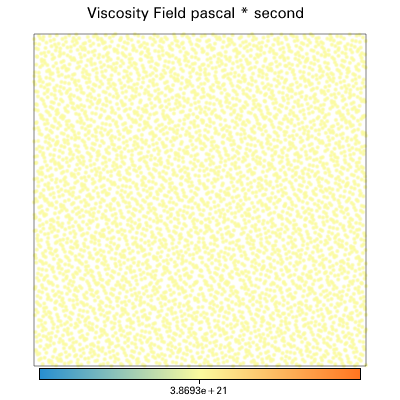

In [20]:
Fig = Model.plot.viscosity(figsize=(400,400), fn_size=5., logScale=True)


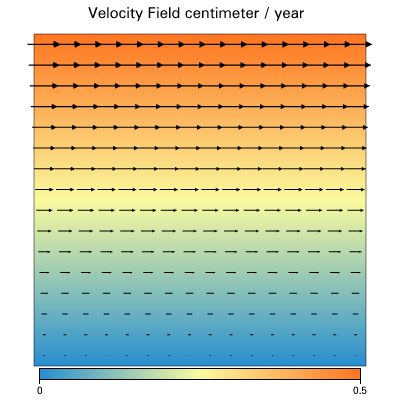

{'antialias': True,
 'axis': False,
 'background': 'white',
 'border': 1,
 'bordercolour': 'black',
 'boundingBox': ((0.0, 0.0), (1.0, 1.0)),
 'margin': 34,
 'max': (1.0, 1.0),
 'min': (0.0, 0.0),
 'quality': 3,
 'resolution': (400, 400),
 'rulers': False,
 'title': 'Velocity Field centimeter / year',
 'zoomstep': 0}

In [21]:
Model.plot.velocityField(figsize=(400,400))


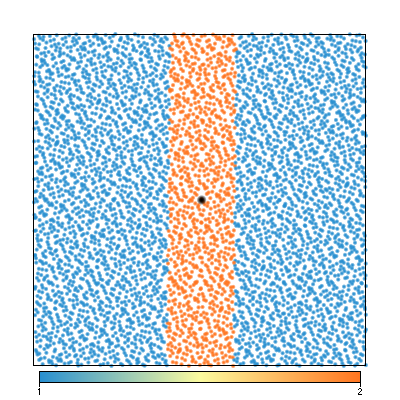

In [22]:
figMaterial.show()

In [23]:
tTracer

[0.0,
 0.210379506498,
 0.420759012996,
 0.631138519494,
 0.841518025992,
 1.05189753249,
 1.262277038988,
 1.472656545486,
 1.683036051984,
 1.893415558482,
 2.10379506498,
 2.314174571478,
 2.524554077976,
 2.7349335844739997,
 2.945313090972,
 3.15569259747,
 3.366072103968,
 3.5764516104659996,
 3.786831116964,
 3.997210623462,
 4.20759012996,
 4.4179696364579994,
 4.628349142955999,
 4.838728649453999,
 5.0491081559519975,
 5.259487662449998,
 5.469867168947997,
 5.680246675445996,
 5.890626181943997,
 6.101005688441996,
 6.311385194939995,
 6.311385194939998]

In [24]:
totalStress_xy

[0.0,
 array([0.00029323]),
 array([0.00052587]),
 array([0.00071043]),
 array([0.00085686]),
 array([0.00097302]),
 array([0.00106518]),
 array([0.0011383]),
 array([0.00119631]),
 array([0.00124233]),
 array([0.00127884]),
 array([0.0013078]),
 array([0.00133078]),
 array([0.00134902]),
 array([0.00136348]),
 array([0.00137496]),
 array([0.00138406]),
 array([0.00139128]),
 array([0.00139701]),
 array([0.00140156]),
 array([0.00140516]),
 array([0.00140803]),
 array([0.0014103]),
 array([0.0014121]),
 array([0.00141352]),
 array([0.00141466]),
 array([0.00141556]),
 array([0.00141627]),
 array([0.00141684]),
 array([0.00141729]),
 array([0.00141764]),
 array([0.00141764])]

In [25]:
import numpy as np

# analytic soln of elastic shear stress component
V  = 0.5 * u.centimetre / u.year
h  = 100. * u.kilometer
eta = 1e22 * u.pascal * u.second
mu = 10. * u.gigapascal
t_relax = 32000 * u.years
C1 = -V*V*eta*eta*mu/(mu*mu*h*h + V*V*eta*eta);
C2 = -V*h*eta*mu *mu/(mu*mu*h*h + V*V*eta*eta);

increment =  301 #int(10 / (dt_e / 3.0) )
t = np.linspace(0, 10*t_relax, increment)
t *= u.years

analyticSoln = np.exp(-mu/eta*t)*(C2*np.cos(V*t/h)-C1*np.sin(V*t/h))-C2

In [26]:
import pylab as plt

plt.plot(t, analyticSoln.to(u.pascal))
plt.xlim(0, 200000)
plt.show()

In [27]:
analyticSoln[10].to(u.pascal)

<Quantity(4528493.63168, 'pascal')>

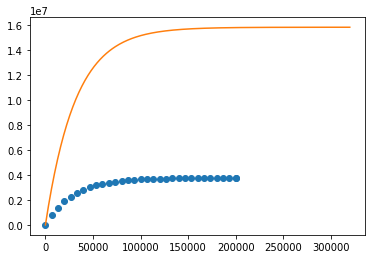

In [28]:
import pylab as plt

plt.plot(GEO.Dimensionalize(tTracer, u.years), GEO.Dimensionalize(totalStress_xy, u.pascal), "o")
plt.plot(t.to(u.years), analyticSoln.to(u.pascal))
plt.show()

In [94]:
GEO.nd(10. * u.megapascal)

0.003775437006833543


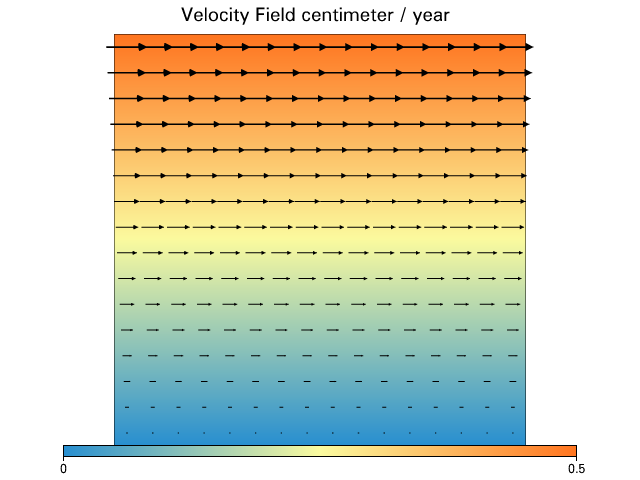

{'antialias': True,
 'axis': False,
 'background': 'white',
 'border': 1,
 'bordercolour': 'black',
 'boundingBox': ((0.0, 0.0), (1.0, 1.0)),
 'margin': 34,
 'max': (1.0, 1.0),
 'min': (0.0, 0.0),
 'quality': 3,
 'resolution': (640, 480),
 'rulers': False,
 'title': 'Velocity Field centimeter / year',
 'zoomstep': 0}

In [95]:
Model.plot.velocityField()


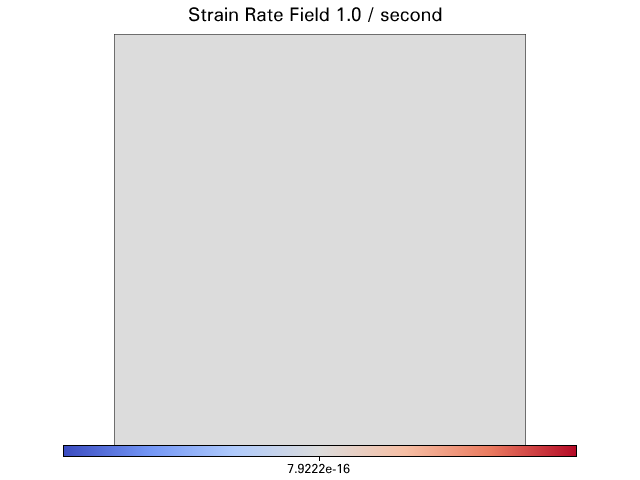

{'antialias': True,
 'axis': False,
 'background': 'white',
 'border': 1,
 'bordercolour': 'black',
 'boundingBox': ((0.0, 0.0), (1.0, 1.0)),
 'margin': 34,
 'max': (1.0, 1.0),
 'min': (0.0, 0.0),
 'quality': 3,
 'resolution': (640, 480),
 'rulers': False,
 'title': 'Strain Rate Field 1.0 / second',
 'zoomstep': 0}

In [96]:
Model.plot.strainRate()

In [97]:
(8e-16 / u.second).to(1/u.years)

<Quantity(2.52455407798e-08, '1 / year')>

In [30]:
Model.maxViscosity

<Quantity(1e+25, 'pascal * second')>

In [32]:
A = viscoelasticBar.elasticity._effectiveViscosity()

In [34]:
GEO.Dimensionalize(A.evaluate(Model.swarm), u.pascal * u.second)

<Quantity([[3.86931283e+21]
 [3.86931283e+21]
 [3.86931283e+21]
 ...
 [3.86931283e+21]
 [3.86931283e+21]
 [3.86931283e+21]], 'pascal * second')>